In [24]:
import os
import pandas as pd

In [25]:
FILTER_SDATA = True

In [26]:
fjssp_path = r'C:\Users\huda\Downloads\paper_results\paper_results\fjssp\\'

In [27]:
cp_path_fjssp = fjssp_path + 'results_cplex_cp.txt'
ortools_path_fjssp = fjssp_path + 'results_ortools.txt'
gurobi_path_fjssp = fjssp_path + 'results_gurobi.txt'
cplp_path_fjssp = fjssp_path + 'results_cplex_lp.txt'
hexaly_path_fjssp = fjssp_path + 'results_hexaly.txt'
ga_best_path_fjssp = fjssp_path + 'ga_best.txt'
ga_average_path_fjssp = fjssp_path + 'ga_average.txt'

optal_path_fjssp = r'C:\Users\huda\Downloads\OPTAL_FJSSP\OPTAL_FJSSP\DEFAULT'

In [28]:
fjssp_w_path = r'C:\Users\huda\Downloads\paper_results\paper_results\fjssp-w\\'

In [29]:
cp_path_fjssp_w = fjssp_w_path + 'results_cplex_cp.txt'
ortools_path_fjssp_w = fjssp_w_path + 'results_ortools.txt'
gurobi_path_fjssp_w = fjssp_w_path + 'results_gurobi.txt'
cplp_path_fjssp_w = fjssp_w_path + 'results_cplex_lp.txt'
hexaly_path_fjssp_w = fjssp_w_path + 'results_hexaly.txt'
ga_best_path_fjssp_w = r'C:\Users\huda\Downloads\OneDrive_1_5-6-2025\ga_all_best.txt'#fjssp_w_path + 'ga_best.txt'
ga_average_path_fjssp_w = r'C:\Users\huda\Downloads\OneDrive_1_5-6-2025\ga_sorted_average.txt'#fjssp_w_path + 'ga_average.txt'

optal_path = r'C:\Users\huda\Downloads\DEFAULT\DEFAULT'

In [30]:
import json
def read_optal_results(path):
    files = os.listdir(path)
    result = dict()
    for file in files:
        if FILTER_SDATA and 'sdata' in file:
            continue
        with open(path + '/' + file, 'r') as f:
            data = json.load(f)
            fitness_history = []
            lb_history = []
            for entry in data['objectiveHistory']:
                fitness_history.append([entry['solveTime'], entry['objective']])
            for entry in data['lowerBoundHistory']:
                lb_history.append([entry['solveTime'], entry['value']])
            fitness = fitness_history[-1][1]
            lb = lb_history[-1][1]
            s = data['startTimes']
            m = data['machines']
            w = data['workers']
            result[file[:-9]] = {
                'fitness_value': fitness,
                'lower_bound': lb,
                's': s,
                'm': m,
                'w': w,
                'best_result_history': fitness_history,
                'lb_hist': lb_history,
                'runtime': fitness_history[-1][0]
            }
    return result

def read_optal_results_fjssp(path):
    files = os.listdir(path)
    result = dict()
    for file in files:
        if FILTER_SDATA and 'sdata' in file.lower():
            continue
        with open(path + '/' + file, 'r') as f:
            data = json.load(f)
            fitness_history = []
            lb_history = []
            for entry in data['objectiveHistory']:
                fitness_history.append([entry['solveTime'], entry['objective']])
            for entry in data['lowerBoundHistory']:
                lb_history.append([entry['solveTime'], entry['value']])
            fitness = fitness_history[-1][1]
            lb = lb_history[-1][1]
            s = data['startTimes']
            m = data['machines']
            result[file[:-9]] = {
                'fitness_value': fitness,
                'lower_bound': lb,
                's': s,
                'm': m,
                'best_result_history': fitness_history,
                'lb_hist': lb_history,
                'runtime': fitness_history[-1][0]
            }
    return result



In [31]:
optal_data = read_optal_results(optal_path)

In [32]:
optal_data_fjssp = read_optal_results_fjssp(optal_path_fjssp)

In [33]:
optal_data.keys()

dict_keys(['0_BehnkeGeiger_10_workers', '0_BehnkeGeiger_11_workers', '0_BehnkeGeiger_12_workers', '0_BehnkeGeiger_13_workers', '0_BehnkeGeiger_14_workers', '0_BehnkeGeiger_15_workers', '0_BehnkeGeiger_16_workers', '0_BehnkeGeiger_17_workers', '0_BehnkeGeiger_18_workers', '0_BehnkeGeiger_19_workers', '0_BehnkeGeiger_1_workers', '0_BehnkeGeiger_20_workers', '0_BehnkeGeiger_21_workers', '0_BehnkeGeiger_22_workers', '0_BehnkeGeiger_23_workers', '0_BehnkeGeiger_24_workers', '0_BehnkeGeiger_25_workers', '0_BehnkeGeiger_26_workers', '0_BehnkeGeiger_27_workers', '0_BehnkeGeiger_28_workers', '0_BehnkeGeiger_29_workers', '0_BehnkeGeiger_2_workers', '0_BehnkeGeiger_30_workers', '0_BehnkeGeiger_31_workers', '0_BehnkeGeiger_32_workers', '0_BehnkeGeiger_33_workers', '0_BehnkeGeiger_34_workers', '0_BehnkeGeiger_35_workers', '0_BehnkeGeiger_36_workers', '0_BehnkeGeiger_37_workers', '0_BehnkeGeiger_38_workers', '0_BehnkeGeiger_39_workers', '0_BehnkeGeiger_3_workers', '0_BehnkeGeiger_40_workers', '0_Beh

In [34]:
def read_file(file : str, worker : bool = True) -> pd.DataFrame:
    if worker:
        file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    else:#
        file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    df = pd.DataFrame(file_content)
    del file_content
    if worker:
        df = df.drop(columns=['result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram'])
    else:
        df = df.drop(columns=['result_vector1', 'result_vector2', 'peak_cpu', 'peak_ram'])
    df = df[~df['name'].str.startswith('Error')]
    df = df[df['fitness_value'] != float('inf')]
    return df

In [35]:
cp_fjssp = read_file(cp_path_fjssp, False)
cp_fjssp_w = read_file(cp_path_fjssp_w)

In [36]:
cplp_fjssp = read_file(cplp_path_fjssp, False)
cplp_fjssp_w = read_file(cplp_path_fjssp_w)

In [37]:
gurobi_fjssp = read_file(gurobi_path_fjssp, False)
gurobi_fjssp_w = read_file(gurobi_path_fjssp_w)

In [38]:
ortools_fjssp = read_file(ortools_path_fjssp, False)
ortools_fjssp_w = read_file(ortools_path_fjssp_w)

In [39]:
hexaly_fjssp = read_file(hexaly_path_fjssp, False)
hexaly_fjssp_w = read_file(hexaly_path_fjssp_w)

In [40]:
ga_best_fjssp = read_file(ga_best_path_fjssp, False)
ga_best_fjssp_w = read_file(ga_best_path_fjssp_w)

In [41]:
ga_average_fjssp = read_file(ga_average_path_fjssp, False)
ga_average_fjssp_w = read_file(ga_average_path_fjssp_w)

In [42]:
solver = dict()
solver['cplex_cp'] = dict()
solver['ortools'] = dict()
solver['ga_best'] = dict()
solver['ga_average'] = dict()
solver['gurobi'] = dict()
solver['cplex_lp'] = dict()
solver['hexaly'] = dict()

solver['optal'] = dict()

In [43]:
def remap(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[0].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[0].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[-1]
    if values[0].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[0].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[0].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[0].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name

In [44]:
def setup_dict():
    compare = dict()
    compare['worker'] = dict()
    compare['no_worker'] = dict()
    return compare

In [45]:
def change_name(name):
    full = name.split('_')
    if len(full) > 1:
        name = ''.join(full[1:-1]).lower()
    else:
        name = full[0].lower()
    if name.endswith('.fjs'):
        name = name[:-4]
    if name.startswith('behnkegeiger'):
        name = name.replace('geiger', '')
    if name.startswith('brand') and 'mk' in name:
        name = name.replace('mk', '')
    return name

def get_last(history):
    data = history.split('(')
    result = float(data[-1][:-2].split(', ')[0])
    return result

def extract_time_to_best(instances):
    result = dict()
    #NOTE: does not work for hexaly
    for index, row in instances.iterrows():
        history = row['best_result_history']
        result[change_name(row['name'])] = get_last(history)
    return result

def extract_n_improvements(instances):
    result = dict()
    for index, row in instances.iterrows():
        history = row['best_result_history']
        count = 0
        if not '<docplex' in history:
            history_list = eval(history.replace('inf', 'float("inf")'))
            last = history_list[0][1]
            count = 1
            for i in range(1, len(history_list)):
                if history_list[i][1] != last:
                    last = history_list[i][1]
                    count += 1
        result[change_name(row['name'])] = count
    return result

def extract_solver_data(fjssp, fjssp_w):
    compare = setup_dict()
    time_to_best = extract_time_to_best(fjssp)
    n_improvements = extract_n_improvements(fjssp)
    for index, row in fjssp.iterrows():
        name = change_name(row['name'])
        if FILTER_SDATA and 'sdata' in name:
            continue
        compare['no_worker'][name] = {
            'fitness': row['fitness_value'],
            'lower_bound': row['lower_bound'],
            'status': row['optimization_status'],
            'runtime': row['runtime'],
            'time_to_best': time_to_best[name],
            'n_improvements': n_improvements[name] # TODO: test
        }
    time_to_best = extract_time_to_best(fjssp_w)
    n_improvements = extract_n_improvements(fjssp_w)
    for index, row in fjssp_w.iterrows():
        name = change_name(row['name'])
        if FILTER_SDATA and 'sdata' in name:
            continue
        #name = row['name']#remap(row['name'][2:-12])
        #if name in compare['no_worker']:
        compare['worker'][name] = {
            'fitness': row['fitness_value'],
            'lower_bound': row['lower_bound'],
            'status': row['optimization_status'],
            'runtime': row['runtime'],
            'time_to_best': time_to_best[name],
            'n_improvements': n_improvements[name] # TODO: test
        }
    return compare

In [46]:
solver['cplex_cp'] = extract_solver_data(cp_fjssp, cp_fjssp_w)
solver['cplex_lp'] = extract_solver_data(cplp_fjssp, cplp_fjssp_w)
solver['gurobi'] = extract_solver_data(gurobi_fjssp, gurobi_fjssp_w)
solver['ortools'] = extract_solver_data(ortools_fjssp, ortools_fjssp_w)
solver['ga_best'] = extract_solver_data(ga_best_fjssp, ga_best_fjssp_w)
solver['ga_average'] = extract_solver_data(ga_average_fjssp, ga_average_fjssp_w)
solver['hexaly'] = extract_solver_data(hexaly_fjssp, hexaly_fjssp_w)

In [49]:
solver['ga_best']['worker']['hurinkedata24'].keys()

dict_keys(['fitness', 'lower_bound', 'status', 'runtime', 'time_to_best', 'n_improvements'])

In [ ]:
optal_dict = setup_dict()
for entry in optal_data:
    name = change_name(entry)
    optal_dict['worker'][name] = {
        'fitness': optal_data[entry]['fitness_value'],
        'lower_bound': optal_data[entry]['lower_bound'],
        'status': 1 if optal_data[entry]['fitness_value'] == optal_data[entry]['lower_bound'] else 0,
        'runtime': optal_data[entry]['runtime'],
        'time_to_best': optal_data[entry]['runtime'],
        'n_improvements': 0
    }
for entry in optal_data_fjssp:
    name = change_name(entry)
    optal_dict['no_worker'][name] = {
        'fitness': optal_data_fjssp[entry]['fitness_value'],
        'lower_bound': optal_data_fjssp[entry]['lower_bound'],
        'status': 1 if optal_data_fjssp[entry]['fitness_value'] == optal_data_fjssp[entry]['lower_bound'] else 0,
        'runtime': optal_data_fjssp[entry]['runtime'],
        'time_to_best': optal_data_fjssp[entry]['runtime'],
        'n_improvements': 0
}
solver['optal'] = optal_dict

In [ ]:
for s in solver:
    print(f'{s}: {len(solver[s]["no_worker"])} | {len(solver[s]["worker"])}')

cplex_cp: 336 | 336
ortools: 336 | 331
ga_best: 336 | 336
ga_average: 336 | 336
gurobi: 336 | 254
cplex_lp: 336 | 255
hexaly: 336 | 336
optal: 336 | 336


In [ ]:
def calculate_average_operations(job_sequence):
    n_jobs = 1
    counts = [1]
    for i in range(1, len(job_sequence)):
        if job_sequence[i] != job_sequence[i-1]:
            n_jobs+=1
            counts.append(0)
        counts[-1] += 1
    return (sum(counts))/n_jobs

def get_max_w(durations):
    max = 0
    for operation in durations:
        for machine in operation:
            for worker in machine:
                if worker > max:
                    max = worker
    return max

def get_max(durations):
    max = 0
    for operation in durations:
        for machine in operation:
        
            if machine > max:
                max = machine
    return max

def worker_flexibility(benchmark):
    n_assignments = 0
    m = benchmark.n_machines()
    o = benchmark.n_operations()
    durations = benchmark.durations()
    combs = dict()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    n_assignments += 1
                combs[(j,k)] = 1
    average_assignments = n_assignments / o
    return average_assignments / len(combs)

def flexibility(benchmark):
    n_assignments = 0
    m = benchmark.n_machines()
    o = benchmark.n_operations()
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            if durations[i][j] > 0:
                n_assignments += 1
    average_assignments = n_assignments / o
    return average_assignments / n_assignments

def get_flexibility_and_dv_worker(benchmark):
    all = 0
    unique = []
    machines_available = 0
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    if durations[i][j][k] not in unique:
                        unique.append(durations[i][j][k])
                    all += 1
            if any([x > 0 for x in durations[i][j]]):
                machines_available+=1
    return worker_flexibility(benchmark), len(unique) / all

def get_flexibility_and_dv(benchmark):
    all = 0
    unique = []
    machines_available = 0
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            if durations[i][j] > 0:
                if durations[i][j] not in unique:
                    unique.append(durations[i][j])
                all += 1
        if any([x > 0 for x in durations[i]]):
            machines_available+=1
    return flexibility(benchmark), len(unique) / all

In [ ]:
def calculate_duration_features_workers(durations):
    all_durations = []
    for duration in durations:
        for d in duration:
            all_durations.extend(d)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    stdev = statistics.stdev(all_durations)
    return min_duration, max_duration, span, stdev

def calculate_duration_features(durations):
    all_durations = []
    for duration in durations:
        all_durations.extend(duration)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    #stdev = statistics.stdev(all_durations)
    mean = sum(all_durations)/len(all_durations)
    var = sum(pow(x-mean, 2) for x in all_durations) / len(all_durations)
    stdev = math.sqrt(var)
    return min_duration, max_duration, span, stdev


In [ ]:
import statistics
import math
def remap_full(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[1].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[1].startswith('Brandimarte'):
        return 'Brandimarte'+values[-1]
    if values[1].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[1].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[1].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[1].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name.lower()

from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import os
includeWorkers = False
if includeWorkers:
    path = r'C:\Users\huda\Downloads\paper_results\paper_results\benchmarks_with_workers'
    parser = WorkerBenchmarkParser()
else:
    path = r'C:\Users\huda\Downloads\paper_results\paper_results\benchmarks_no_workers'
    parser = BenchmarkParser()
instances = os.listdir(path)
instance_data = dict()
consider_duration_features = True
for instance in instances:
    encoding = parser.parse_benchmark(path + "\\" + instance)
    feature_vector = []
    min_d, max_d, d_span, d_stdev = calculate_duration_features(encoding.durations()) if not includeWorkers else calculate_duration_features_workers(encoding.durations())
    #TODO: worker data, or just do it with base FJSSP since all benchmarks are transformed in the same way
    f, dv = get_flexibility_and_dv(encoding) if not includeWorkers else get_flexibility_and_dv_worker(encoding)
    extracted_data = {
        "name": change_name(instance),
        "n_jobs": encoding.n_jobs(), 
        "n_machines": encoding.n_machines(),
        "n_operations": encoding.n_operations(),
        "durations": encoding.durations(),
        "job_sequence": encoding.job_sequence(),
        "machines_for_all_operations": encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(),
        "flexibility": f,
        "duration_variety": dv,
        "average_operations": calculate_average_operations(encoding.job_sequence()),
        "min_duration": min_d,
        "max_duration": max_d,
        "duration_span": d_span,
        "duration_std": d_stdev
    }
    instance_data[change_name(instance[:-4]) if not includeWorkers else remap_full(instance[:-12])] = extracted_data

In [ ]:
instance_data.keys()

dict_keys(['behnke1', 'behnke10', 'behnke11', 'behnke12', 'behnke13', 'behnke14', 'behnke15', 'behnke16', 'behnke17', 'behnke18', 'behnke19', 'behnke2', 'behnke20', 'behnke21', 'behnke22', 'behnke23', 'behnke24', 'behnke25', 'behnke26', 'behnke27', 'behnke28', 'behnke29', 'behnke3', 'behnke30', 'behnke31', 'behnke32', 'behnke33', 'behnke34', 'behnke35', 'behnke36', 'behnke37', 'behnke38', 'behnke39', 'behnke4', 'behnke40', 'behnke41', 'behnke42', 'behnke43', 'behnke44', 'behnke45', 'behnke46', 'behnke47', 'behnke48', 'behnke49', 'behnke5', 'behnke50', 'behnke51', 'behnke52', 'behnke53', 'behnke54', 'behnke55', 'behnke56', 'behnke57', 'behnke58', 'behnke59', 'behnke6', 'behnke60', 'behnke7', 'behnke8', 'behnke9', 'brandimarte1', 'brandimarte10', 'brandimarte11', 'brandimarte12', 'brandimarte13', 'brandimarte14', 'brandimarte15', 'brandimarte2', 'brandimarte3', 'brandimarte4', 'brandimarte5', 'brandimarte6', 'brandimarte7', 'brandimarte8', 'brandimarte9', 'chambersbarnes1', 'chambersbarn

In [ ]:
def print_instance(data):
    print(f"# Operations: {data['n_operations']} | # Machines: {data['n_machines']} | Flexibility: {data['flexibility']} | Duration Variety: {data['duration_variety']}")

In [ ]:
def get_diff(solver, filter : bool = False, verbose : bool = False):
    diff = []
    o = []
    m = []
    f = []
    dv = []
    for instance in solver['worker']:
        if instance in solver['no_worker']:
            if filter and min(solver["no_worker"][instance]["runtime"], 1200) == min(solver["worker"][instance]["runtime"], 1200):
                continue
            if verbose:
                print(instance)
                print_instance(instance_data[instance])
                print(f'FJSSP Status: {solver["no_worker"][instance]["status"]} | FJSSP-W Status: {solver["worker"][instance]["status"]}')
                print(f'FJSSP Runtime: {solver["no_worker"][instance]["runtime"]} | FJSSP-W Status: {solver["worker"][instance]["runtime"]}')
            diff.append(abs(solver["worker"][instance]["runtime"]-solver["no_worker"][instance]["runtime"]))
            o.append(instance_data[instance]['n_operations'])
            m.append(instance_data[instance]['n_machines'])
            f.append(instance_data[instance]['flexibility'])
            dv.append(instance_data[instance]['duration_variety'])
    return diff, o, m, f, dv

In [ ]:
import matplotlib.pyplot as plt
def plot_runtime_difference(diff, o, m, f, dv, filter : bool = False):
    fig = plt.figure(layout='tight', figsize=(15, 8))
    axs = fig.subplots(2, 2)
    fig.suptitle(f'{"(Filtered)" if filter else ""} Benchmark Selection - FJSSP Benchmark Attributes')
    axs[0][0].scatter(diff, o)
    axs[0][0].set_title('Operations')
    axs[0][0].set_xlabel('runtime worker - runtime no worker')
    axs[0][0].set_ylabel('# operations')
    axs[0][1].scatter(diff, m)
    axs[0][1].set_title('Machines')
    axs[0][1].set_xlabel('runtime worker - runtime no worker')
    axs[0][1].set_ylabel('# machines')
    axs[1][0].scatter(diff, f)
    axs[1][0].set_title('Flexibility')
    axs[1][0].set_xlabel('runtime worker - runtime no worker')
    axs[1][0].set_ylabel('flexibility')
    axs[1][1].scatter(diff, dv)
    axs[1][1].set_title('Duration Variety')
    axs[1][1].set_xlabel('runtime worker - runtime no worker')
    axs[1][1].set_ylabel('duration variety')
    plt.show()


In [ ]:
diff, o, m, f, dv = get_diff(solver['cplex_cp'], filter=True)

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
colors = {
    'cplex_cp': 'blue',
    'ortools': 'slateblue',
    'hexaly': 'mediumvioletred',
    'ga_best': 'forestgreen',
    'ga_average': 'limegreen',
    'gurobi': 'rosybrown',
    'cplex_lp': 'lightcoral',
    'optal': 'deepskyblue'
}
markers = {
    'cplex_cp': '^',
    'ortools': 'v',
    'hexaly': 'x',
    'ga_best': '>',
    'ga_average': '<',
    'gurobi': 'o',
    'cplex_lp': 'p',
    'optal': 'd'
}
markerson = 0.1

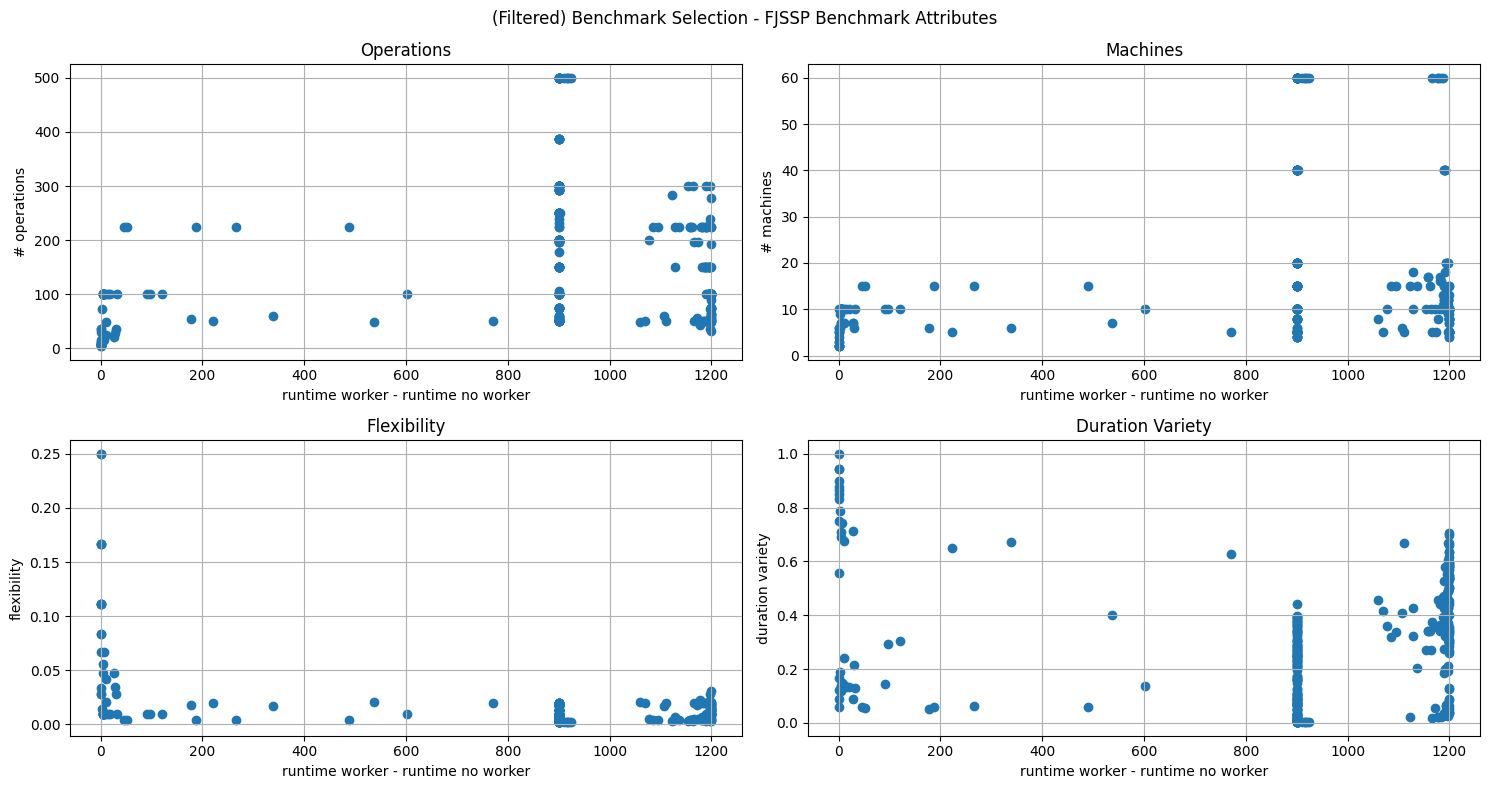

In [ ]:
plot_runtime_difference(diff, o, m, f, dv, True)

In [ ]:
def get_comparison(data, instance, column, max = False):
    best_fjssp = float('inf')
    best_fjssp_w = float('inf')
    for key in data.keys():
        if instance in data[key]['no_worker']:
            fitness_fjssp = data[key]['no_worker'][instance]['fitness']#optimizer['no_worker']['name'] == instance][column].tolist()[0]
            if fitness_fjssp < best_fjssp:
                best_fjssp = fitness_fjssp
        if instance in data[key]['worker']:
            fitness_fjssp_w = data[key]['worker'][instance]['fitness']#optimizer.loc[optimizer['worker']['name'] == instance][column].tolist()[0]
            if fitness_fjssp_w < best_fjssp_w:
                best_fjssp_w = fitness_fjssp_w
    return best_fjssp, best_fjssp_w

def calculate_value(fitness, best):
    return ((fitness - best) / best)

def get_best_fjssp(path = r'C:\Users\huda\Downloads\paper_results\paper_results\fjssp\best_known_20250307.csv'):
    import csv
    result = dict()
    with open(path, 'r') as f:
        csv_data = csv.DictReader(f, delimiter=';')
        for data in csv_data:
            #print(data)
            #print(remap_full(data['Source']+'_'+data['Instance']))
            result[change_name(remap_full(data['Source']+'_'+data['Instance']))] = int(float(data['UB_ges']) + 0.5)
    return result

def get_cdf_comparison_vector(data : dict, column, max, instances, known_best = False, known_path = None):
    results = []
    if known_best:
        if known_path:
            all_best_fjssp = get_best_fjssp(known_path)
        else:
            all_best_fjssp = get_best_fjssp()
    for _ in data:
        results.append([[],[]])
    for instance in instances:
        best_fjssp, best_fjssp_w = get_comparison(data, instance, column, max)
        if known_best:
            best_fjssp = all_best_fjssp[instance]
        i = 0
        for key in data.keys():
            if instance in data[key]['no_worker']:
                results[i][0].append(calculate_value(data[key]['no_worker'][instance]['fitness'], best_fjssp))
            if instance in data[key]['worker']:
                results[i][1].append(calculate_value(data[key]['worker'][instance]['fitness'], best_fjssp_w))
            i += 1
    for result in results:
        result[0].sort()
        result[1].sort()
    return results

In [ ]:
def ecdf_inf(data, column = 'fitness_value', max : bool = False, n_instances : int = 30, labels : list[str] = [], instances : list[str] = [], colors : list[str] = [], hlines : list = [], markers : list = [], markerson : list = [], known_best_fjssp = False):
    vectors = get_cdf_comparison_vector(data, column, max, instances, known_best_fjssp)
    plot_vectors = []

    for vector in vectors:
        plot_vectors.append([[[0.0],[0.0]], [[0.0],[0.0]]])
        i = 1
        while i < len(vector[0]):
            if vector[0][i] == float('inf'):
                break
            if vector[0][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0][0].append(vector[0][i-1])
            plot_vectors[-1][0][1].append((i-1)/n_instances)
            i += 1
        i = 1
        while i < len(vector[1]):
            if vector[1][i] == float('inf'):
                break
            if vector[1][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][1][0].append(vector[1][i-1])
            plot_vectors[-1][1][1].append((i-1)/n_instances)
            i += 1
    fig = plt.figure(layout='tight', figsize=(10, 5))
    axs = fig.subplots(1, 2)
    for i in range(len(vectors)):
        axs[0].plot(plot_vectors[i][0][0], plot_vectors[i][0][1], label=[labels[i]], c=colors[labels[i]], linestyle='solid', marker=markers[labels[i]], markevery=markerson)
    axs[0].set_title('FJSSP')
    if not known_best_fjssp:
        axs[0].set_xlim(-0.01, 0.7)
    else:
        axs[0].set_xlim(-0.25, 0.7)
    axs[0].set_xlabel('$\delta_{rel}$')
    axs[0].set_ylabel('Portion of instances $\leq \delta_{rel}$')
    axs[0].axhline(y=hlines[0], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
    axs[0].legend()
    for i in range(len(vectors)):
        axs[1].plot(plot_vectors[i][1][0], plot_vectors[i][1][1], label=[labels[i]], c=colors[labels[i]], marker=markers[labels[i]], markevery=markerson)
    axs[1].axhline(y=hlines[1], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
    axs[1].set_title('FJSSP-W')
    axs[1].set_xlabel('$\delta_{rel}$')
    axs[1].set_ylabel('Portion of instances $\leq \delta_{rel}$')
    axs[1].set_xlim(-0.01, 0.7)
    axs[1].legend()

    #plt.xlim(-0.1, 1.0)
    plt.legend()
    #plt.title('FJSSP - FJSSP-W')
    plt.show()

In [ ]:
optimal_instances = {'no_worker': [], 'worker': []}
for instance in solver['ga_best']['worker']:
    for s in solver:
        #if s == 'cplex_cp' or s == 'ortools':
        if instance in solver[s]['no_worker']:
            if solver[s]['no_worker'][instance]['status'] == 1 and instance not in optimal_instances['no_worker']:
                    optimal_instances['no_worker'].append(instance)
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['status'] == 1 and instance not in optimal_instances['worker']:
                optimal_instances['worker'].append(instance)

In [ ]:
h_line_fjssp = len(optimal_instances['no_worker'])/len(solver['ga_best']['worker'])
h_line_fjssp_w = len(optimal_instances['worker'])/len(solver['ga_best']['worker'])

In [ ]:
filtered_instances = list(solver['cplex_cp']['worker'].keys())

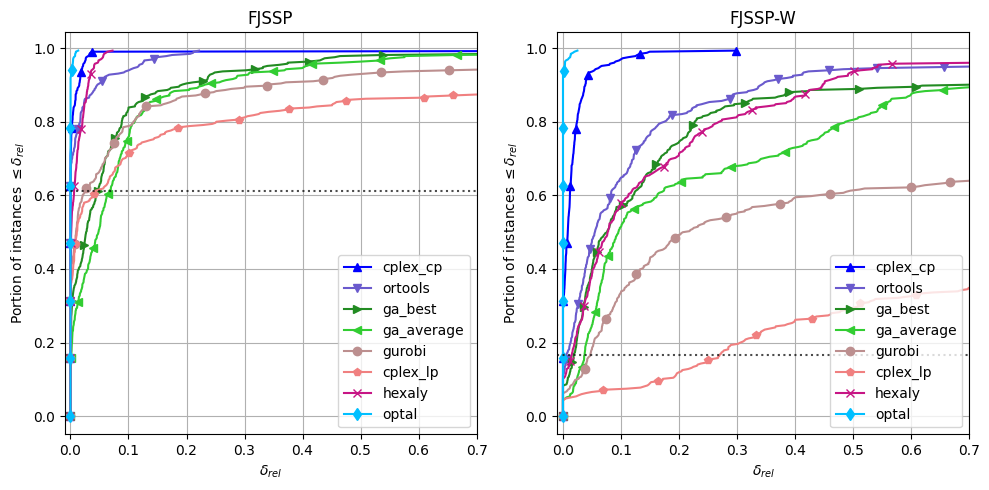

In [ ]:
ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson)

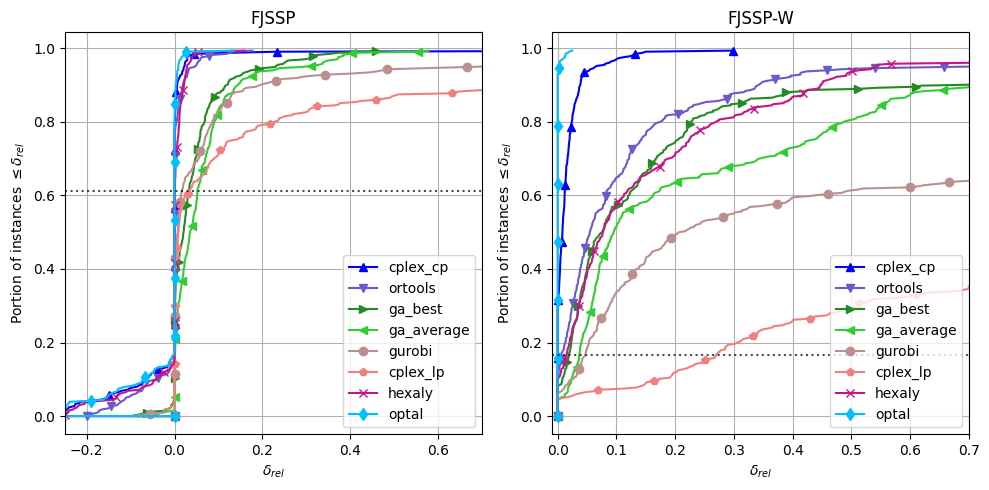

In [ ]:
ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson, known_best_fjssp=True)

In [ ]:
"""sub_selection = [
 'DPpaulli15.fjs',
 'Fattahi14.fjs',
 'Fattahi14.fjs',
 'DPpaulli15.fjs',
 'HurinkVdata49.fjs',
 'BrandimarteMk2.fjs',
 'DPpaulli18.fjs',
 'BrandimarteMk2.fjs',
 'Kacem3.fjs',
 'HurinkSdata35.fjs',
 'HurinkSdata50.fjs',
 'HurinkSdata50.fjs',
 'Behnke56.fjs',
 'Behnke56.fjs',
 'Fattahi18.fjs',
 'Behnke60.fjs',
 'Behnke55.fjs',
 'Behnke42.fjs',
 'HurinkSdata35.fjs',
 'HurinkSdata55.fjs',
 'HurinkSdata55.fjs',
 'Behnke60.fjs',
 'HurinkRdata54.fjs',
 'HurinkSdata1.fjs',
 'Behnke60.fjs',
 'BrandimarteMk8.fjs',
 'Behnke42.fjs',
 'Fattahi20.fjs',
 'Kacem4.fjs',
 'HurinkVdata30.fjs'
]"""
sub_selection = ['DPpaulli6.fjs', 'HurinkRdata50.fjs', 'HurinkVdata50.fjs', 'DPpaulli9.fjs', 'HurinkVdata3.fjs', 'HurinkVdata4.fjs', 'DPpaulli18.fjs', 'BrandimarteMk2.fjs', 'Kacem3.fjs', 'DPpaulli1.fjs', 'HurinkEdata18.fjs', 'HurinkEdata8.fjs', 'DPpaulli8.fjs', 'HurinkRdata25.fjs', 'HurinkRdata1.fjs', 'Behnke59.fjs', 'Behnke49.fjs', 'Behnke42.fjs', 'ChambersBarnes15.fjs', 'HurinkEdata23.fjs', 'HurinkEdata55.fjs', 'HurinkEdata38.fjs', 'HurinkEdata63.fjs', 'HurinkEdata1.fjs', 'BrandimarteMk14.fjs', 'BrandimarteMk12.fjs', 'Behnke24.fjs', 'Fattahi20.fjs', 'Kacem4.fjs', 'HurinkVdata30.fjs']
subset = []
for name in sub_selection:
    name = change_name(name)
    if FILTER_SDATA and 'sdata' in name:
        continue
    subset.append(name)

In [ ]:
filtered_instances = subset

In [ ]:
subset_optimal_instances = {'no_worker': [], 'worker': []}
count = 0
for instance in subset:
    count += 1
    for s in solver:
        if instance in solver[s]['no_worker']:
            if solver[s]['no_worker'][instance]['status'] == 1 and instance not in subset_optimal_instances['no_worker']:
                subset_optimal_instances['no_worker'].append(instance)
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['status'] == 1 and instance not in subset_optimal_instances['worker']:
                subset_optimal_instances['worker'].append(instance)
h_line_fjssp = len(subset_optimal_instances['no_worker'])/len(subset)
h_line_fjssp_w = len(subset_optimal_instances['worker'])/len(subset)

In [ ]:
count

30

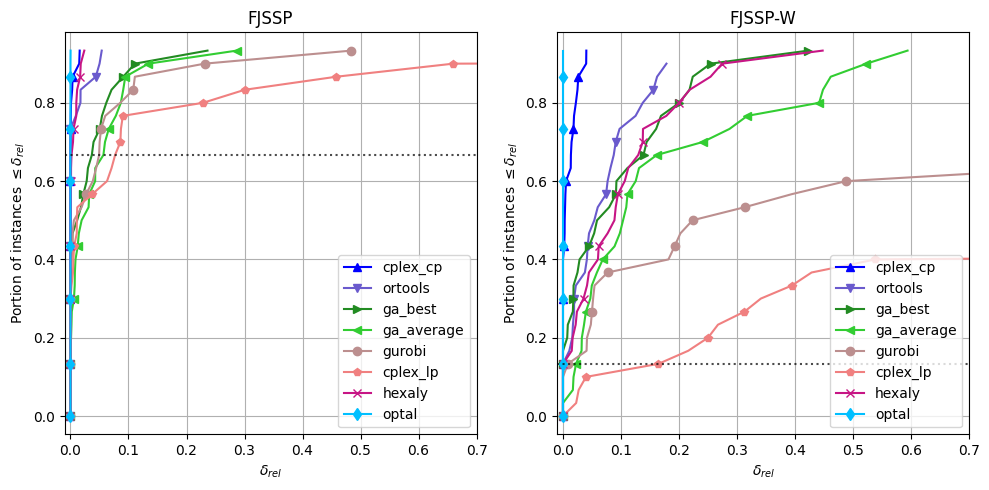

In [ ]:
ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson)

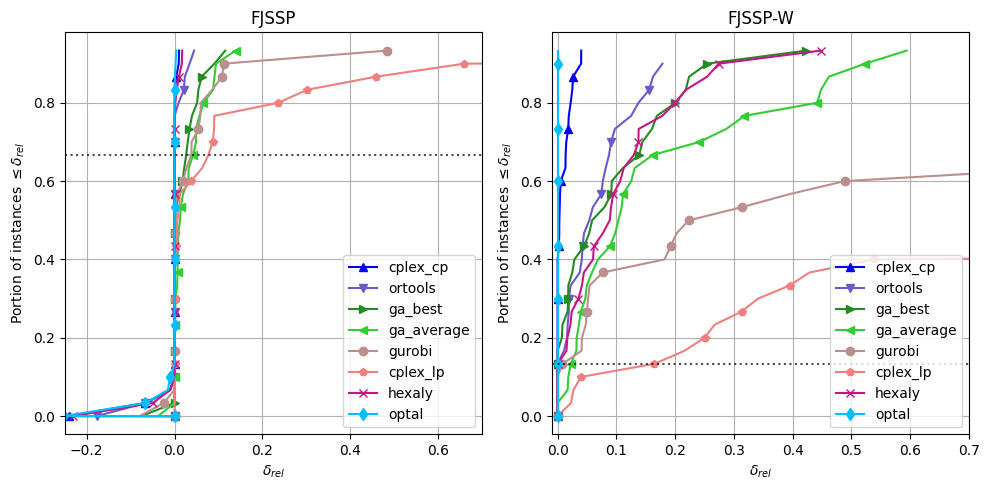

In [ ]:
ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson, known_best_fjssp=True)

In [ ]:
def single_ecdf_inf(data, column = 'fitness_value', max : bool = False, n_instances : int = 30, labels : list[str] = [], instances : list[str] = [], colors : list[str] = [], hlines : list = [], markers : list = [], markerson : list = [], known_best_fjssp = False):
    vectors = get_cdf_comparison_vector(data, column, max, instances, known_best_fjssp)
    plot_vectors = []

    for vector in vectors:
        plot_vectors.append([[[0.0],[0.0]], [[0.0],[0.0]]])
        i = 1
        while i < len(vector[0]):
            if vector[0][i] == float('inf'):
                break
            if vector[0][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0][0].append(vector[0][i-1])
            plot_vectors[-1][0][1].append((i-1)/n_instances)
            i += 1
        i = 1
        while i < len(vector[1]):
            if vector[1][i] == float('inf'):
                break
            if vector[1][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][1][0].append(vector[1][i-1])
            plot_vectors[-1][1][1].append((i-1)/n_instances)
            i += 1
    #fig = plt.figure(layout='tight', figsize=(10, 5))
    #axs = fig.subplots(1, 2)
    for i in range(len(vectors)):
        plt.plot(plot_vectors[i][0][0][1:], plot_vectors[i][0][1][1:], label=[labels[i]], c=colors[labels[i]], linestyle='solid', marker=markers[labels[i]], markevery=markerson)
    plt.title('FJSSP')
    if not known_best_fjssp:
        plt.xlim(-0.01, 0.7)
    else:
        plt.xlim(-0.25, 0.7)
    plt.xlabel('$\delta_{rel}$')
    plt.ylabel('Portion of instances $\leq \delta_{rel}$')
    plt.axhline(y=hlines[0], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
    plt.legend()
    plt.show()
    if not known_best_fjssp:
        for i in range(len(vectors)):
            plt.plot(plot_vectors[i][1][0][1:], plot_vectors[i][1][1][1:], label=[labels[i]], c=colors[labels[i]], marker=markers[labels[i]], markevery=markerson)
        plt.axhline(y=hlines[1], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
        plt.title('FJSSP-W')
        plt.xlabel('$\delta_{rel}$')
        plt.ylabel('Portion of instances $\leq \delta_{rel}$')
        plt.xlim(-0.01, 0.7)
        plt.legend()

    #plt.xlim(-0.1, 1.0)
    #plt.legend()
    #plt.title('FJSSP - FJSSP-W')
        plt.show()

In [ ]:
colors = {
    'cplex_cp': 'blue',
    'ortools': 'slateblue',
    'hexaly': 'purple',
    'ga_best': 'green',
    'ga_average': 'orange',
    'gurobi': 'rosybrown',
    'cplex_lp': 'lightcoral',
    'optal': 'deepskyblue'
}

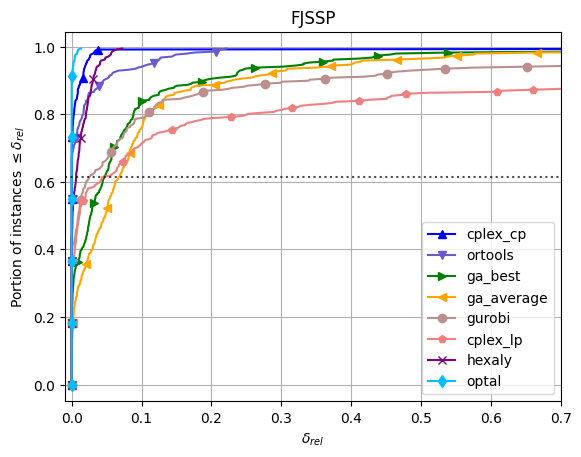

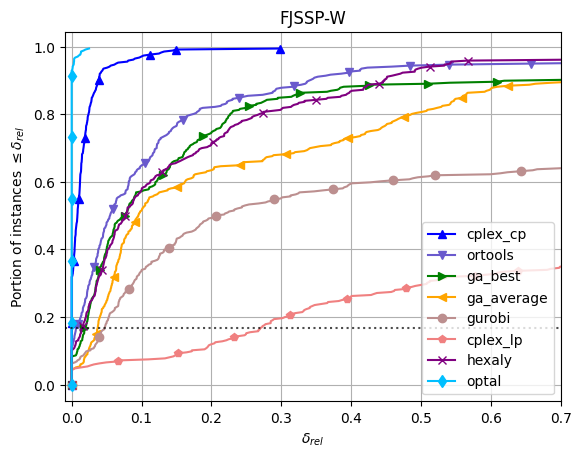

In [ ]:
h_line_fjssp = len(optimal_instances['no_worker'])/len(solver['ga_best']['worker'])
h_line_fjssp_w = len(optimal_instances['worker'])/len(solver['ga_best']['worker'])
filtered_instances = list(solver['cplex_cp']['worker'].keys())
single_ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson)

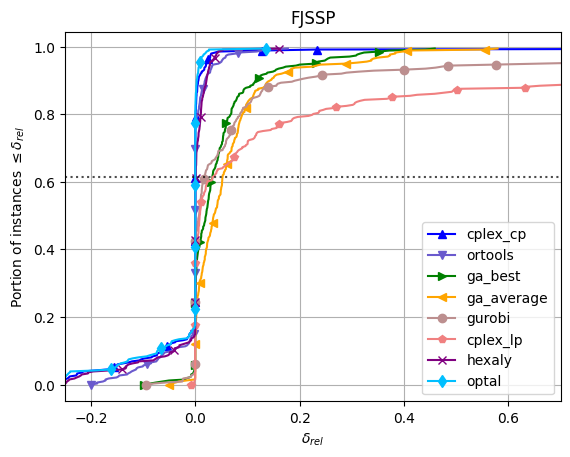

In [ ]:
single_ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson, known_best_fjssp=True)

In [ ]:
filtered_instances = subset
subset_optimal_instances = {'no_worker': [], 'worker': []}
count = 0
for instance in subset:
    count += 1
    for s in solver:
        if instance in solver[s]['no_worker']:
            if solver[s]['no_worker'][instance]['status'] == 1 and instance not in subset_optimal_instances['no_worker']:
                subset_optimal_instances['no_worker'].append(instance)
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['status'] == 1 and instance not in subset_optimal_instances['worker']:
                subset_optimal_instances['worker'].append(instance)
h_line_fjssp = len(subset_optimal_instances['no_worker'])/len(subset)
h_line_fjssp_w = len(subset_optimal_instances['worker'])/len(subset)

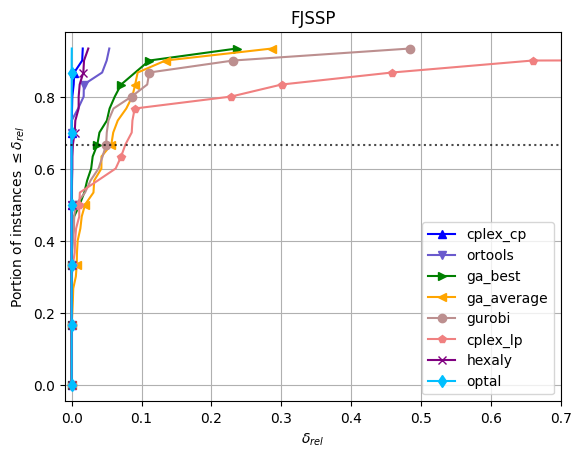

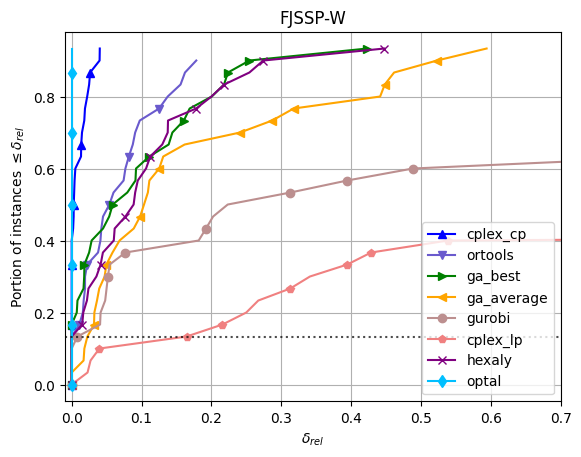

In [ ]:
single_ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson)

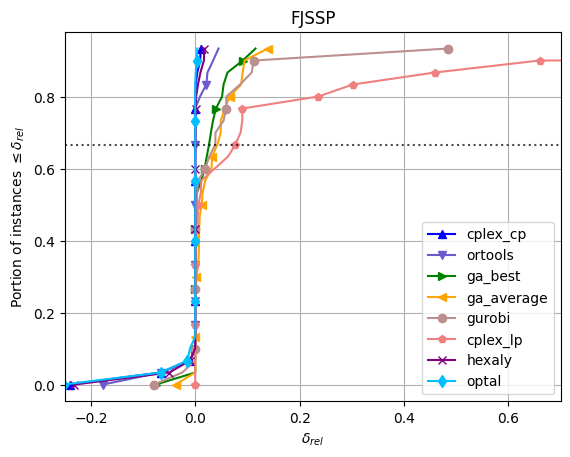

In [ ]:
single_ecdf_inf(solver, instances=filtered_instances, n_instances=len(filtered_instances), labels=list(solver.keys()), colors=colors, hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson, known_best_fjssp=True)

In [ ]:
best_fjssp = dict()
best_fjssp_w = dict()
for instance in solver['ga_best']['worker']:
    best_fjssp[instance] = float('inf')
    best_fjssp_w[instance] = float('inf')
    for s in solver:
        if instance in solver[s]['no_worker']:
            if solver[s]['no_worker'][instance]['fitness'] < best_fjssp[instance]:
                best_fjssp[instance] = solver[s]['no_worker'][instance]['fitness']
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['fitness'] < best_fjssp_w[instance]:
                best_fjssp_w[instance] = solver[s]['worker'][instance]['fitness']
gaps = dict()
for s in solver:
    gaps[s] = {'worker': dict(), 'no_worker': dict()}


In [ ]:
for instance in solver['ga_best']['worker']:
    for s in solver:
        if instance in solver[s]['no_worker']:
            gap_fjssp = calculate_value(solver[s]['no_worker'][instance]['fitness'], best_fjssp[instance])
        if instance in solver[s]['worker']:
            gap_fjssp_w = calculate_value(solver[s]['worker'][instance]['fitness'], best_fjssp_w[instance])
        gaps[s]['worker'][instance] = gap_fjssp_w
        gaps[s]['no_worker'][instance] = gap_fjssp


In [ ]:
average_gaps = dict()
for s in solver:
    avg_fjssp = 0
    avg_fjssp_w = 0
    for instance in gaps[s]['worker']:
        avg_fjssp_w += gaps[s]['worker'][instance]
    for instance in gaps[s]['no_worker']:
        avg_fjssp += gaps[s]['no_worker'][instance]
    avg_fjssp_w /= len(gaps[s]['worker'])
    avg_fjssp /= len(gaps[s]['no_worker'])
    average_gaps[s] = {'fjssp': avg_fjssp, 'fjssp_w': avg_fjssp_w}


In [ ]:
average_gaps # NOTE: gaps to found best, not literature

{'cplex_cp': {'fjssp': 0.013606913989302574, 'fjssp_w': 0.01705150180999622},
 'ortools': {'fjssp': 0.015158568854500901, 'fjssp_w': 0.1342021878905392},
 'ga_best': {'fjssp': 0.0693587057595838, 'fjssp_w': 0.18426364015811011},
 'ga_average': {'fjssp': 0.08913465093321937, 'fjssp_w': 0.2777996801001923},
 'gurobi': {'fjssp': 0.29377617762120145, 'fjssp_w': 0.7824697035290674},
 'cplex_lp': {'fjssp': 0.7861144166172749, 'fjssp_w': 2.5853096914030185},
 'hexaly': {'fjssp': 0.009563094322375894, 'fjssp_w': 0.19864861893594965},
 'optal': {'fjssp': 0.000383874149486983, 'fjssp_w': 0.0005730224824039711}}

In [ ]:
def get_gaps_below(data, value):
    fjssp = 0
    fjssp_w = 0
    for instance in data['no_worker']:
        if data['no_worker'][instance] <= value:
            fjssp+=1
    for instance in data['worker']:
        if data['worker'][instance] <= value:
            fjssp_w+=1
    return fjssp, fjssp_w

In [ ]:
def print_gaps(data, value):
    print(f'Gap <= {value}')
    for s in data:
        fjssp, fjssp_w = get_gaps_below(data[s], value)
        print(f'{s}: FJSSP: {fjssp} ({(fjssp/402)*100}%), FJSSP-W: {fjssp_w} ({(fjssp_w/402)*100}%)')

In [ ]:
print_gaps(gaps, 0)
print_gaps(gaps, 0.05)
print_gaps(gaps, 0.1)
print_gaps(gaps, 0.2)

Gap <= 0
cplex_cp: FJSSP: 135 (33.582089552238806%), FJSSP-W: 95 (23.6318407960199%)
ortools: FJSSP: 124 (30.845771144278604%), FJSSP-W: 26 (6.467661691542288%)
ga_best: FJSSP: 20 (4.975124378109453%), FJSSP-W: 16 (3.9800995024875623%)
ga_average: FJSSP: 7 (1.7412935323383085%), FJSSP-W: 6 (1.4925373134328357%)
gurobi: FJSSP: 63 (15.671641791044777%), FJSSP-W: 17 (4.228855721393035%)
cplex_lp: FJSSP: 98 (24.378109452736318%), FJSSP-W: 9 (2.2388059701492535%)
hexaly: FJSSP: 59 (14.676616915422885%), FJSSP-W: 22 (5.472636815920398%)
optal: FJSSP: 208 (51.741293532338304%), FJSSP-W: 300 (74.6268656716418%)
Gap <= 0.05
cplex_cp: FJSSP: 334 (83.08457711442786%), FJSSP-W: 315 (78.35820895522389%)
ortools: FJSSP: 304 (75.62189054726367%), FJSSP-W: 162 (40.298507462686565%)
ga_best: FJSSP: 212 (52.736318407960205%), FJSSP-W: 135 (33.582089552238806%)
ga_average: FJSSP: 173 (43.03482587064676%), FJSSP-W: 84 (20.8955223880597%)
gurobi: FJSSP: 224 (55.72139303482587%), FJSSP-W: 73 (18.15920398009

In [ ]:
from benchmarkrewriter.benchmark_parser import BenchmarkParser, WorkerBenchmarkParser, WorkerEncoding
def worker_flexibility(benchmark : WorkerEncoding):
    n_assignments = 0
    m = benchmark.n_machines()
    o = benchmark.n_operations()
    durations = benchmark.durations()
    w = durations.shape[2]
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    n_assignments += 1
    average_assignments = n_assignments / o
    return average_assignments / (m*w)

def get_flexibility_and_dv_worker(benchmark):
    all = 0
    unique = []
    machines_available = 0
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    if durations[i][j][k] not in unique:
                        unique.append(durations[i][j][k])
                    all += 1
            if any([x > 0 for x in durations[i][j]]):
                machines_available+=1
    #return (machines_available / len(durations)) / benchmark.n_machines(), len(unique) / all
    return worker_flexibility(benchmark), len(unique) / all

def get_max(durations):
    max = 0
    for operation in durations:
        for machine in operation:
            for worker in machine:
                if worker > max:
                    max = worker
    return max

def read_benchmarks_workers(path):
    result = dict()
    benchmarks = os.listdir(path)
    for benchmark in benchmarks:
        instance_name = change_name(remap(benchmark[2:-12]))
        if FILTER_SDATA and 'sdata' in instance_name:
            continue
        #parser = BenchmarkParser()
        parser = WorkerBenchmarkParser()
        data = parser.parse_benchmark(path + '/' + benchmark)
        #f, dv = get_flexibility_and_dv(data)
        f, dv = get_flexibility_and_dv_worker(data)
        metrics = dict()

        max_duration = get_max(data.durations())
        counts = [0] * (max_duration+1)
        for operation in data.durations():
            for machine in operation:
                for worker in machine:
                    if worker > 0:
                        counts[worker] += 1
        d_distinct = [x for x in range(len(counts)) if counts[x] > 0]
        d_unique = [x for x in range(len(counts)) if counts[x] == 1]
        d_shared = [x for x in range(len(counts)) if counts[x] > 1]
        metrics['d_distinct'] = d_distinct
        metrics['d_unique'] = d_unique
        metrics['d_shared'] = d_shared
        metrics['d_average'] = sum(counts)/data.n_operations()
        result[instance_name] = {'n_operations': data.n_operations(), 'flexibility': f, 'duration_variety': dv, 'n_machines': data.n_machines(), 'additional_metrics': metrics}

    return result

In [ ]:
fjssp_w_benchmarks = r'C:\Users\huda\Downloads\paper_results\paper_results\benchmarks_with_workers'
benchmark_data = read_benchmarks_workers(fjssp_w_benchmarks)

In [ ]:
def get_stats(instances):
    o = [] 
    m = []
    f = []
    dv = []
    a = []

    for instance in instances:
        o.append(instances[instance]['n_operations'])
        m.append(instances[instance]['n_machines'])
        f.append(instances[instance]['flexibility'])
        dv.append(instances[instance]['duration_variety'])
        if 'additional_metrics' not in instances[instance]:
            durations = instances[instance]['durations']
            count = 0
            for operation in durations:
                for machine in operation:
                    for worker in machine:
                        if worker > 0:
                            count+=1
            a.append(count/instances[instance]['n_operations'])
        else:
            a.append(instances[instance]['additional_metrics']['d_average'])
    o_stdev = statistics.stdev(o)
    o_mean = statistics.mean(o)
    a_stdev = statistics.stdev(a)
    a_mean = statistics.mean(a)
    m_stdev = statistics.stdev(m)
    m_mean = statistics.mean(m)
    f_stdev = statistics.stdev(f)
    f_mean = statistics.mean(f)
    dv_stdev = statistics.stdev(dv)
    dv_mean = statistics.mean(dv)
    return {'operations': (o_mean, o_stdev, max(o), min(o)), 'avg_assignments': (a_mean, a_stdev, max(a), min(a)), 'machines': (m_mean, m_stdev, max(m), min(m)), 'flexibility': (f_mean, f_stdev, max(f), min(f)), 'duration_variety': (dv_mean, dv_stdev, max(dv), min(dv))}


In [ ]:
get_stats(benchmark_data)

{'operations': (153.40178571428572, 116.16479235067884, 500, 4),
 'avg_assignments': (93.44221139631519,
  210.0461003622132,
  1016.84,
  2.8333333333333335),
 'machines': (14.428571428571429, 14.154824683961603, 60, 2),
 'flexibility': (0.17035318539324473,
  0.10734359857912686,
  0.75,
  0.032476851851851854),
 'duration_variety': (0.13546803114009237,
  0.21842178950210636,
  0.95,
  5.666916766593299e-05)}

In [ ]:
selected_benchmarks = dict()
for instance in subset:
    selected_benchmarks[instance] = benchmark_data[instance]

In [ ]:
get_stats(selected_benchmarks)

{'operations': (144.2, 120.5588710104335, 500, 30),
 'avg_assignments': (106.40340327822928, 240.85476499604093, 833.576, 4.52),
 'machines': (14.266666666666667, 16.82144225505738, 60, 4),
 'flexibility': (0.19584921811134248,
  0.1307563026999245,
  0.5384523809523809,
  0.03626157407407408),
 'duration_variety': (0.1334562835534622,
  0.22800337322558753,
  0.8104575163398693,
  5.998253308636525e-05)}

In [ ]:
import csv

def load_data(bounds, best_known):
    data = dict()
    with open(bounds) as bounds_file:
        bounds_data = csv.reader(bounds_file, delimiter=';')
        for row in bounds_data:
            name = change_name(row[0])
            if FILTER_SDATA and 'sdata' in name:
                continue
            if name not in data:
                data[name] = dict()
            data[name]['lb'] = int(row[1])
            data[name]['ub'] = int(row[2])
    with open(best_known) as best_known_file:
        best_known_data = csv.reader(best_known_file, delimiter=';')
        for row in best_known_data:
            name = change_name(row[0].split('_')[1])
            if FILTER_SDATA and 'sdata' in name:
                continue
            if name not in data:
                data[name] = dict()
            data[name]['f'] = float(row[1])
    return data

In [ ]:
data = load_data('bounds.txt', 'best_known_curated.txt')

In [ ]:
def normalize(x, lb, ub):
    if lb == ub:
        return 1.0
    return (x - lb) / (ub - lb)

In [ ]:
def normalize_history(history, bounds):
    result = []
    m = max([d[1] for d in history])
    for i in range(len(history)):
    #for data in history:
        #f = normalize(data[1], bounds['f'], bounds['ub'])
        #lb = normalize(data[2], bounds['lb'], bounds['f'])
        if history[i][1] == float('inf'):
            history[i] = (history[i][0], bounds['ub'], history[i][2])
            #history[i] = (history[i][0], history[i+1][0], history[i][2]) if i+1 < len(history) else (history[i][0], 1.0, history[i][2])
            #data = (data[0], m, data[2])
        if history[i][2] == -float('inf'):
            history[i] = (history[i][0], history[i][1], bounds['lb'])
            #history[i] = (history[i][0], history[i][1], history[i+1][2]) if i+1 < len(history) else (history[i][0], history[i][1], 0.0)
            #data = (data[0], data[0], 0)
        f = normalize(history[i][1], bounds['lb'], bounds['ub'])
        lb = normalize(history[i][2], bounds['lb'], bounds['ub'])
        result.append([history[i][0], f, lb])
    return result

In [ ]:
solver['ga_best']['worker']['behnke41'].keys()

dict_keys(['fitness', 'lower_bound', 'status', 'runtime', 'time_to_best', 'n_improvements'])

In [ ]:
data['fattahi1']

{'lb': 69, 'ub': 211, 'f': 68.999999999999}

In [ ]:
actual_best = dict()
for instance in data:
    best = int(data[instance]['f']+0.5)
    lb = data[instance]['lb']
    for s in solver:
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['fitness'] < best:
                best = solver[s]['worker'][instance]['fitness']
            if solver[s]['worker'][instance]['lower_bound'] > lb:
                best = solver[s]['worker'][instance]['lower_bound']
    optimal = best == data[instance]['lb']
    actual_best[instance] = (best, lb, optimal)

In [ ]:
fjssp_w_data = dict()
single_best = dict()
shared_best = dict()
combined_best = dict()
#optimal = dict()
for s in solver:
    fjssp_w_data[s] = solver[s]['worker']
    single_best[s] = []
    shared_best[s] = []
    combined_best[s] = []


In [ ]:
def get_best_from_solvers(data, instance):
    best = float('inf')
    best_solver = []
    if instance == 'fattahi1':
        print('test')
    for s in data:
        if instance in data[s]:
            fitness = int(data[s][instance]['fitness'] + 0.5)
            if fitness < best:
                best = fitness
    for s in data:
        if instance in data[s]:
            fitness = int(data[s][instance]['fitness'] + 0.5)
            if fitness == best:
                best_solver.append(s)
    return best_solver
    
for instance in actual_best:
    best_solvers = get_best_from_solvers(fjssp_w_data, instance)
    if len(best_solvers) == 1:
        single_best[best_solvers[0]].append(instance)
        combined_best[best_solvers[0]].append(instance)
    else:
        for s in best_solvers:
            shared_best[s].append(instance)
            combined_best[s].append(instance)

test


In [ ]:
for s in solver:
    print(f'{s} | SB: {len(single_best[s])}, ShB: {len(shared_best[s])}, CB: {len(combined_best[s])}')

cplex_cp | SB: 16, ShB: 92, CB: 108
ortools | SB: 1, ShB: 38, CB: 39
ga_best | SB: 1, ShB: 27, CB: 28
ga_average | SB: 0, ShB: 16, CB: 16
gurobi | SB: 0, ShB: 21, CB: 21
cplex_lp | SB: 0, ShB: 15, CB: 15
hexaly | SB: 4, ShB: 31, CB: 35
optal | SB: 218, ShB: 95, CB: 313


In [ ]:
fjssp_w_data = dict()
single_best = dict()
shared_best = dict()
combined_best = dict()
#optimal = dict()
for s in solver:
    fjssp_w_data[s] = solver[s]['worker']
    single_best[s] = []
    shared_best[s] = []
    combined_best[s] = []

In [ ]:
for instance in subset:
    best_solvers = get_best_from_solvers(fjssp_w_data, instance)
    if len(best_solvers) == 1:
        single_best[best_solvers[0]].append(instance)
        combined_best[best_solvers[0]].append(instance)
    else:
        for s in best_solvers:
            shared_best[s].append(instance)
            combined_best[s].append(instance)

In [ ]:
for s in solver:
    print(f'{s} | SB: {len(single_best[s])}, ShB: {len(shared_best[s])}, CB: {len(combined_best[s])}')

cplex_cp | SB: 0, ShB: 13, CB: 13
ortools | SB: 0, ShB: 5, CB: 5
ga_best | SB: 1, ShB: 5, CB: 6
ga_average | SB: 0, ShB: 2, CB: 2
gurobi | SB: 0, ShB: 4, CB: 4
cplex_lp | SB: 0, ShB: 1, CB: 1
hexaly | SB: 0, ShB: 5, CB: 5
optal | SB: 16, ShB: 13, CB: 29


In [ ]:
#Gurobi & 0 & - & - & - & - & - & -\\
def to_table(solver, instances, data):
    return f'{solver} & {len(instances)} & {data["operations"][0]} & {data["operations"][1]} & {data["flexibility"][0]} & {data["flexibility"][1]} & {data["duration_variety"][0]} & {data["duration_variety"][1]}\\\\'

In [ ]:
for s in solver:
    instances = dict()
    for instance in single_best[s]:
        instances[instance] = benchmark_data[instance]
    if len(instances) > 1:
        stats = get_stats(instances)
        print(to_table(s, instances, stats))
    else:
        print(f'{s} & 0 & - & - & - & - & - & -\\\\')
    #print(f'{s} | {get_stats(instances)}')

cplex_cp & 0 & - & - & - & - & - & -\\
ortools & 0 & - & - & - & - & - & -\\
ga_best & 0 & - & - & - & - & - & -\\
ga_average & 0 & - & - & - & - & - & -\\
gurobi & 0 & - & - & - & - & - & -\\
cplex_lp & 0 & - & - & - & - & - & -\\
hexaly & 0 & - & - & - & - & - & -\\
optal & 16 & 193.25 & 134.56274868377702 & 0.2053123061492354 & 0.09386940794331555 & 0.157910224452919 & 0.23900969613010548\\


In [ ]:
for s in solver:
    instances = dict()
    for instance in combined_best[s]:
        instances[instance] = benchmark_data[instance]
    if len(instances) > 1:
        stats = get_stats(instances)
        print(to_table(s, instances, stats))
    else:
        print(f'{s} & 0 & - & - & - & - & - & -\\\\')
    #print(f'{s} | {get_stats(instances)}')

cplex_cp & 13 & 91.07692307692308 & 74.07030617197593 & 0.18879843422711598 & 0.17272282182255552 & 0.11357266059318216 & 0.22700202772961878\\
ortools & 5 & 40.2 & 8.843076387773658 & 0.21340364731430492 & 0.18107429171188666 & 0.24330940313961233 & 0.3427599210061632\\
ga_best & 6 & 80.83333333333333 & 96.5948583862861 & 0.2619451500018554 & 0.21572457730187003 & 0.01669781135949964 & 0.015908352641808277\\
ga_average & 2 & 33 & 4.242640687119285 & 0.3233086419753086 & 0.2913629127022495 & 0.026967607936718367 & 0.023888953741531466\\
gurobi & 4 & 37.75 & 8.0156097709407 & 0.23346884485716685 & 0.20256632940608554 & 0.222591689546833 & 0.3921534481391845\\
cplex_lp & 0 & - & - & - & - & - & -\\
hexaly & 5 & 50.2 & 28.691462144686877 & 0.19804174255240015 & 0.19248437922427133 & 0.2019786770812534 & 0.34272835683689756\\
optal & 29 & 147.44827586206895 & 121.349432339274 & 0.19790953597725083 & 0.1325742431796518 & 0.13803476479165766 & 0.23063137263165748\\


In [ ]:
single_best['cplex_cp']

[]

In [ ]:
shared_best['gurobi']

['kacem3', 'hurinkrdata1', 'hurinkedata55', 'hurinkedata1']

In [ ]:
fjssp_w_data['cplex_cp']['fattahi20']

{'fitness': 1147.0,
 'lower_bound': 884.0,
 'status': 0.0,
 'runtime': 1200.02,
 'time_to_best': 860.212,
 'n_improvements': 75}

In [ ]:
known_best = get_best_fjssp()

In [ ]:
for s in solver:
    for instance in solver[s]['no_worker']:
        if instance in known_best:
            if solver[s]['no_worker'][instance]['lower_bound'] > float('inf'): # todo: read lowerbound from csv
                print(solver[s]['no_worker'][instance].keys())

In [ ]:
def round(value):
    return int(value + 0.5)

direct_comparison = dict()
for s in solver:
    direct_comparison[s] = dict()
    for o in solver:
        if o != s:
            direct_comparison[s][o] = [0,0]
            for instance in solver[s]['no_worker']:
                if instance in solver[o]['no_worker']:
                    if round(solver[s]['no_worker'][instance]['fitness']) < round(solver[o]['no_worker'][instance]['fitness']):
                        direct_comparison[s][o][0]+=1
                    elif round(solver[s]['no_worker'][instance]['fitness']) == round(solver[o]['no_worker'][instance]['fitness']):
                        direct_comparison[s][o][1]+=1
                    #e#lse:
                    #    direct_comparison[s][o][2]+=1
                else:
                    direct_comparison[s][o][0]+=1
        else:
            direct_comparison[s][o] = [0,0]

In [ ]:
direct_comparison

{'cplex_cp': {'cplex_cp': [0, 0],
  'ortools': [95, 219],
  'ga_best': [257, 77],
  'ga_average': [288, 46],
  'gurobi': [200, 134],
  'cplex_lp': [212, 121],
  'hexaly': [164, 159],
  'optal': [21, 216]},
 'ortools': {'cplex_cp': [22, 219],
  'ortools': [0, 0],
  'ga_best': [255, 78],
  'ga_average': [288, 47],
  'gurobi': [201, 135],
  'cplex_lp': [215, 121],
  'hexaly': [109, 151],
  'optal': [19, 212]},
 'ga_best': {'cplex_cp': [2, 77],
  'ortools': [3, 78],
  'ga_best': [0, 0],
  'ga_average': [283, 53],
  'gurobi': [131, 73],
  'cplex_lp': [156, 70],
  'hexaly': [2, 93],
  'optal': [0, 78]},
 'ga_average': {'cplex_cp': [2, 46],
  'ortools': [1, 47],
  'ga_best': [0, 53],
  'ga_average': [0, 0],
  'gurobi': [107, 52],
  'cplex_lp': [137, 49],
  'hexaly': [0, 48],
  'optal': [0, 47]},
 'gurobi': {'cplex_cp': [2, 134],
  'ortools': [0, 135],
  'ga_best': [132, 73],
  'ga_average': [177, 52],
  'gurobi': [0, 0],
  'cplex_lp': [146, 127],
  'hexaly': [38, 119],
  'optal': [0, 137]},
 

In [ ]:
pd.DataFrame(direct_comparison).T

,cplex_cp,ortools,ga_best,ga_average,gurobi,cplex_lp,hexaly,optal
cplex_cp,"[0, 0]","[95, 219]","[257, 77]","[288, 46]","[200, 134]","[212, 121]","[164, 159]","[21, 216]"
ortools,"[22, 219]","[0, 0]","[255, 78]","[288, 47]","[201, 135]","[215, 121]","[109, 151]","[19, 212]"
ga_best,"[2, 77]","[3, 78]","[0, 0]","[283, 53]","[131, 73]","[156, 70]","[2, 93]","[0, 78]"
ga_average,"[2, 46]","[1, 47]","[0, 53]","[0, 0]","[107, 52]","[137, 49]","[0, 48]","[0, 47]"
gurobi,"[2, 134]","[0, 135]","[132, 73]","[177, 52]","[0, 0]","[146, 127]","[38, 119]","[0, 137]"
cplex_lp,"[3, 121]","[0, 121]","[110, 70]","[150, 49]","[63, 127]","[0, 0]","[35, 109]","[0, 122]"
hexaly,"[13, 159]","[76, 151]","[241, 93]","[288, 48]","[179, 119]","[192, 109]","[0, 0]","[3, 146]"
optal,"[99, 216]","[105, 212]","[258, 78]","[289, 47]","[199, 137]","[214, 122]","[187, 146]","[0, 0]"


In [ ]:
def round(value):
    return int(value + 0.5)

direct_comparison = dict()
for s in solver:
    direct_comparison[s] = dict()
    for o in solver:
        if o != s:
            direct_comparison[s][o] = [0,0]
            for name in sub_selection:
                instance = change_name(name)
                if instance in solver[s]['worker']:
                    if instance in solver[o]['worker']:
                        if round(solver[s]['worker'][instance]['fitness']) < round(solver[o]['worker'][instance]['fitness']):
                            direct_comparison[s][o][0]+=1
                        elif round(solver[s]['worker'][instance]['fitness']) == round(solver[o]['worker'][instance]['fitness']):
                            direct_comparison[s][o][1]+=1
                        #e#lse:
                        #    direct_comparison[s][o][2]+=1
                    else:
                        direct_comparison[s][o][0]+=1
        else:
            direct_comparison[s][o] = [0,0]

In [ ]:
pd.DataFrame(direct_comparison).T

,cplex_cp,ortools,ga_best,ga_average,gurobi,cplex_lp,hexaly,optal
cplex_cp,"[0, 0]","[25, 5]","[24, 5]","[27, 3]","[26, 4]","[29, 1]","[25, 5]","[0, 14]"
ortools,"[0, 5]","[0, 0]","[14, 4]","[21, 3]","[24, 5]","[28, 1]","[18, 6]","[0, 5]"
ga_best,"[1, 5]","[12, 4]","[0, 0]","[28, 2]","[21, 4]","[26, 1]","[16, 3]","[1, 5]"
ga_average,"[0, 3]","[6, 3]","[0, 2]","[0, 0]","[21, 2]","[24, 2]","[9, 3]","[0, 3]"
gurobi,"[0, 4]","[0, 5]","[5, 4]","[7, 2]","[0, 0]","[21, 1]","[2, 5]","[0, 4]"
cplex_lp,"[0, 1]","[0, 1]","[3, 1]","[4, 2]","[2, 1]","[0, 0]","[0, 1]","[0, 1]"
hexaly,"[0, 5]","[6, 6]","[11, 3]","[18, 3]","[23, 5]","[29, 1]","[0, 0]","[0, 5]"
optal,"[16, 14]","[25, 5]","[24, 5]","[27, 3]","[26, 4]","[29, 1]","[25, 5]","[0, 0]"


In [ ]:
x = 5
txt = f't {x:30d}'

In [ ]:
print(txt)

t                              5


In [ ]:
def rank_plot(data : dict[str, dict[str, tuple[float,float]]], alpha : float = 0.05, ignore_time : bool = False, title : str = None) -> None:
    import pandas as pd
    from autorank import autorank, plot_stats
    
    plt_data = dict()
    instances = []
    for solver in data:
        for instance in data[solver]:
            if instance not in instances:
                instances.append(instance)
    for solver in data:
        plt_data[solver] = []
        for instance in instances:
            if instance in data[solver]:
                if ignore_time:
                    plt_data[solver].append(data[solver][instance]['fitness'])
                else:
                    plt_data[solver].append(data[solver][instance]['fitness'])
            else:
                plt_data[solver].append(float('inf'))
    df = pd.DataFrame()
    for solver in plt_data:
        df[solver] = plt_data[solver]
    result = autorank(df, alpha=alpha, verbose=False, order='ascending')
    plot_stats(result)
    if title:
        plt.title(title)
    plt.text(0.0, 0.0, f'Friedman test returns $p$ = {result.pvalue:.3e}\n')
    plt.show()

In [ ]:
filtered_instances = list(solver['cplex_cp']['worker'].keys())

In [ ]:
fjssp_w = dict()
fjssp = dict()

for s in solver:
    fjssp_w[s] = solver[s]['worker']
    fjssp[s] = solver[s]['no_worker']

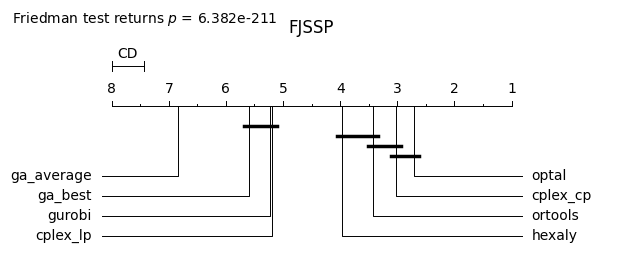

In [ ]:
rank_plot(fjssp, title='FJSSP')

c:\Users\huda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2701: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
c:\Users\huda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2706: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


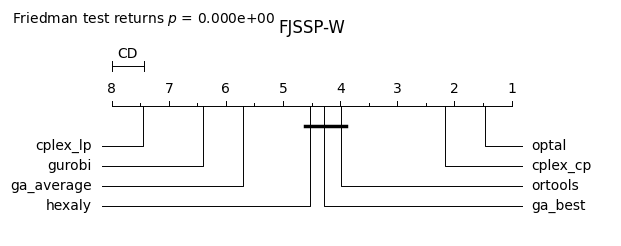

In [ ]:
rank_plot(fjssp_w, title='FJSSP-W')

In [ ]:
def minizinc_score(data : dict[str, dict[str, tuple[float, float]]], ignoreCompletionTime : bool = False) -> dict[str, float]:
    scores = dict()
    for solver in data:
        scores[solver] = 0.0
        for instance in data[solver]:
            if ignoreCompletionTime:
                fitness = data[solver][instance]#
                time = 0
            else:
                time = max(data[solver][instance]['runtime'], 0.00001)
                fitness = data[solver][instance]['fitness']
            for other in data:
                if other != solver:
                    if instance in data[other]:
                        if ignoreCompletionTime:
                            other_time = 0
                            other_fitness = data[other][instance]['fitness']
                        else:
                            other_time = max(data[other][instance]['runtime'], 0.00001)
                            other_fitness = data[other][instance]['fitness']
                        if fitness < other_fitness:
                            scores[solver] += 1.0
                        if fitness == other_fitness:
                            if ignoreCompletionTime:
                                scores[solver] += 0.5
                            else:
                                scores[solver] += other_time / (other_time + time)
                    else:
                        scores[solver] += 1.0
    return scores

In [ ]:
print(minizinc_score(fjssp))

{'cplex_cp': 1742.9467110722771, 'ortools': 1573.6049213352485, 'ga_best': 679.7912254120811, 'ga_average': 297.9315010464194, 'gurobi': 818.9311932433131, 'cplex_lp': 916.4501675075013, 'hexaly': 1362.3848249749515, 'optal': 2015.959455408207}


In [ ]:
print(minizinc_score(fjssp_w))

{'cplex_cp': 1947.3417086748063, 'ortools': 1327.138397799465, 'ga_best': 1211.690176731365, 'ga_average': 776.8529404905182, 'gurobi': 479.17143032028787, 'cplex_lp': 131.04430767639641, 'hexaly': 1177.563487894989, 'optal': 2272.197550412172}
